# Table of Contents for 6.5 Unsupervised Machine Learning Clustering
    Import Libraries
    Set Pach and Import File
    Calculate delivery days
        Set dtype and create a column for delivery_days
        Data Cleaning
        Select only numeric values
    Clustering
        Scale and standardize data
        Use the elbow method
        Select k value
        Run Kmeans and attach to original dataa
    Visualizations
        Delivery Days and Review Score
        Price and Review Score
        Price and Number of Payment Installments
        Price and Number of Product Photos
        Review Score and Number of Product Photos
        Freight Value and Product Weight
    View clusters averages on all numeric numbers
        Adjust to view all columns
    Results

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
# Install (if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

from sklearn.preprocessing import StandardScaler

# Set Path and Import File

In [2]:
path = r'C:\Users\valev\Desktop\Achievement 6\0625 Ecommnerce Brazil'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_all_joined.csv' ), index_col=None)

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Calculate delivery days

In [5]:
# First, review if there are "bad" dates
df[df['order_delivered_customer_date'].str.contains("1/0/1900", na=False)]


order_id  payment_sequential payment_type  \
28      5d9c5817e278892b7498d90bfa28ade8                 1.0  credit_card   
47      afef48d3c8a0b1b7c9b7f8f922fb5674                 1.0  credit_card   
63      c108072ab31ec90a754129c171577f5f                 1.0  credit_card   
68      947e9c6bfd83a06953c420ef92d3da6e                 1.0      voucher   
114     f090de1b2ed9f4e251662cb31e3c7127                 1.0  credit_card   
...                                  ...                 ...          ...   
103807  974f9f87a3bad01b2ac72fe987505e9b                 1.0  credit_card   
103834  8da21fa53a570d0624c7a5d0c14c617a                 1.0  credit_card   
103878  2e3d96522c8c378d4135c12a65c977aa                 1.0  credit_card   
103880  7159096c5aa9be77f7f0c26c01ee9793                 1.0  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                 1.0  credit_card   

        payment_installments  payment_value  order_item_id  \
28                       2.0         290.16            1.0   
47                       5.0         153.41            1.0   
63                       4.0         210.82            1.0   
68                       1.0          69.46            NaN   
114                      2.0          27.63            1.0   
...                      ...            ...            ...   
103807                   3.0          91.18            NaN   
103834                  10.0         252.68            1.0   
103878                   4.0          47.62            1.0   
103880                   4.0         280.65            NaN   
103883                   1.0          47.77            1.0   

                              product_id                         seller_id  \
28      f6dc856631040b5a7843b14a94b09b96  340636a908b13bbe0f4fb63fbe1d0c03   
47      31945c8811d04df20bf86224210b4084  48436dade18ac8b2bce089ec2a041202   
63      c744b9538213403285c97c9f7a53776f  70a12e78e608ac31179aea7f8422044b   
68                                   NaN                               NaN   
114     63de2743d05ab59d85caa49e49459ac1  cbd996ad3c1b7dc71fd0e5f5df9087e2   
...                                  ...                               ...   
103807                               NaN                               NaN   
103834  f76b8eae9da79861cd75f86a1020879e  94e93ce877be27a515118dbfd2c2be41   
103878  036734b5a58d5d4f46b0616ddc047ced  ea8482cd71df3c1969d7b9473ff13abc   
103880                               NaN                               NaN   
103883  848ef0a103ee21407d1fbd0f7e7ae179  3d621842b2ed28e2b474132480edac3c   

       shipping_limit_date   price  ...  order_delivered_carrier_date  \
28           5/3/2018 8:31  110.90  ...                 1/0/1900 0:00   
47        11/17/2017 16:50  134.90  ...                 1/0/1900 0:00   
63        10/20/2017 21:28  200.00  ...              10/26/2017 20:40   
68                     NaN     NaN  ...                 1/0/1900 0:00   
114        2/27/2017 10:10   15.75  ...               2/23/2017 18:47   
...                    ...     ...  ...                           ...   
103807                 NaN     NaN  ...                 1/0/1900 0:00   
103834     6/13/2017 17:10  237.99  ...                6/9/2017 12:03   
103878    11/30/2017 10:11   29.99  ...              11/27/2017 18:52   
103880                 NaN     NaN  ...                 1/0/1900 0:00   
103883    11/27/2017 17:46   39.99  ...                 1/0/1900 0:00   

       order_delivered_customer_date  order_estimated_delivery_date  \
28                     1/0/1900 0:00                 5/10/2018 0:00   
47                     1/0/1900 0:00                 12/6/2017 0:00   
63                     1/0/1900 0:00                10/26/2017 0:00   
68                     1/0/1900 0:00                 8/28/2018 0:00   
114                    1/0/1900 0:00                 3/23/2017 0:00   
...                              ...                            ...   
103807                 1/0/1900 0:00               

In [6]:
# Remove bad dates which are for either orders cancelled or still in transit - 3132 rows
df = df[~df['order_delivered_customer_date'].str.contains("1/0/1900", na=False)]

In [7]:
# Convert to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')


In [8]:
# Drop any rows where delivery date or purchase timestamp is missing
df = df[df['order_purchase_timestamp'].notnull() & df['order_delivered_customer_date'].notnull()]

# Create delivery_time_days column
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


In [9]:
# Select only numeric columns
df_kmeans = df.select_dtypes(include=[np.number]).copy()

In [10]:
df_kmeans.head()

payment_sequential  payment_installments  payment_value  order_item_id  \
0                 1.0                   8.0          99.33            1.0   
1                 1.0                   1.0          24.39            1.0   
2                 1.0                   1.0          65.71            1.0   
3                 1.0                   8.0         107.78            1.0   
4                 1.0                   2.0         128.45            1.0   

    price  freight_value  product_name_lenght  product_description_lenght  \
0   79.80          19.53                 57.0                       921.0   
1   17.00           7.39                 59.0                      1274.0   
2   56.99           8.72                 54.0                      1536.0   
3   89.90          17.88                 60.0                       188.0   
4  113.57          14.88                 54.0                       120.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 8.0             800.0               17.0               27.0   
1                 2.0             150.0               16.0                6.0   
2                 2.0             250.0               20.0                8.0   
3                 1.0            1200.0               44.0                2.0   
4                 1.0             835.0               40.0                9.0   

   product_width_cm  review_score  customer_zip_code_prefix  \
0              17.0           1.0                   39801.0   
1              11.0           5.0                    2422.0   
2              21.0           5.0                    2652.0   
3              35.0           5.0                   36060.0   
4              33.0           5.0                   18570.0   

   seller_zip_code_prefix  delivery_time_days  
0                 13321.0                  13  
1                  4660.0                   3  
2                  9015.0                   6  
3                 13405.0                  14  
4                 14940.0                  11

In [11]:
df_kmeans.shape

(100754, 17)

In [12]:
# Drop columns that are IDs or likely irrelevant (optional)
cols_to_drop = ['payment_sequential', 'order_item_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'product_name_lenght', 'product_description_lenght', 'product_length_cm', 'product_height_cm', 'product_width_cm']
df_kmeans.drop(columns=[col for col in cols_to_drop if col in df_kmeans.columns], inplace=True)

# Drop rows with null values
df_kmeans.dropna(inplace=True)

In [13]:
df_kmeans.shape

(100078, 8)

# Scale the data - standardize

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmeans)

# Convert back to DataFrame for clarity
df_scaled = pd.DataFrame(scaled_data, columns=df_kmeans.columns)


# Elbow Method

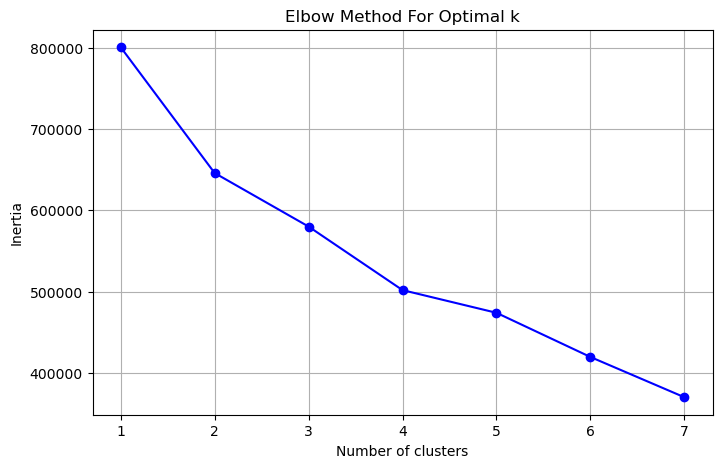

In [16]:
inertia = []
K = range(1, 8)   # Added all 8 to see the dropoff better

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

### I will use k=3 because the inertia begins to level off at this point, indicating diminishing returns in added clustering accuracy. 4 shows the same dropoff as 3.

# Run K-means with k=3

In [17]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)


In [28]:
# Attach clusters to original data
df_kmeans['Cluster'] = df_scaled['Cluster']

# Visualize

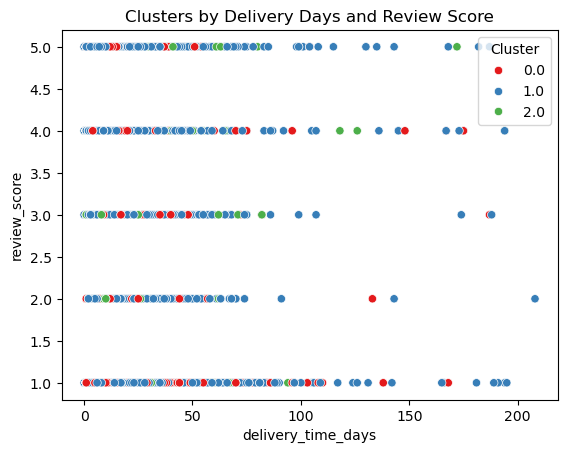

In [31]:
# Example 1: delivery days vs review score
sns.scatterplot(data=df_kmeans, x='delivery_time_days', y='review_score', hue='Cluster', palette='Set1')
plt.title('Clusters by Delivery Days and Review Score')
plt.show()


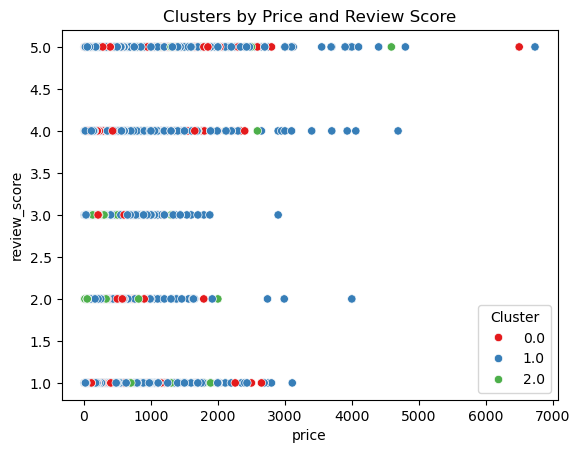

In [32]:
# Example 2: price vs review score
sns.scatterplot(data=df_kmeans, x='price', y='review_score', hue='Cluster', palette='Set1')
plt.title('Clusters by Price and Review Score')
plt.show()

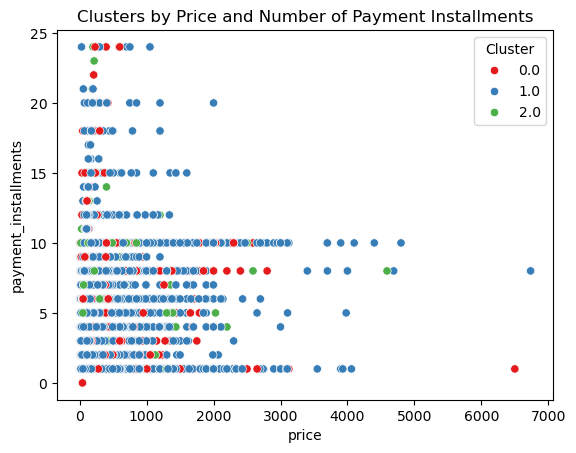

In [33]:
# Example 3: price vs payment_installments
sns.scatterplot(data=df_kmeans, x='price', y='payment_installments', hue='Cluster', palette='Set1')
plt.title('Clusters by Price and Number of Payment Installments')
plt.show()

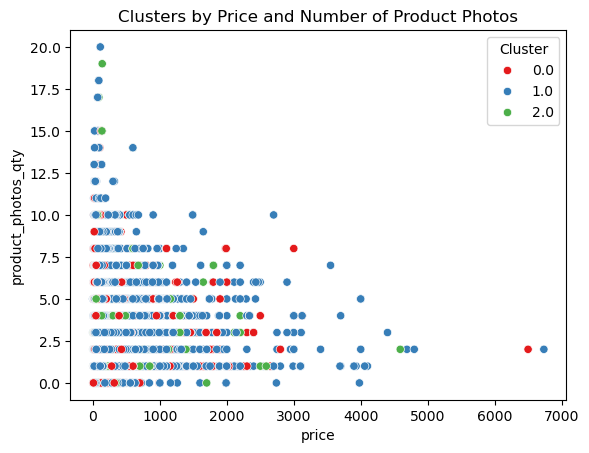

In [34]:
# Example 4: price vs number of photos
sns.scatterplot(data=df_kmeans, x='price', y='product_photos_qty', hue='Cluster', palette='Set1')
plt.title('Clusters by Price and Number of Product Photos')
plt.show()

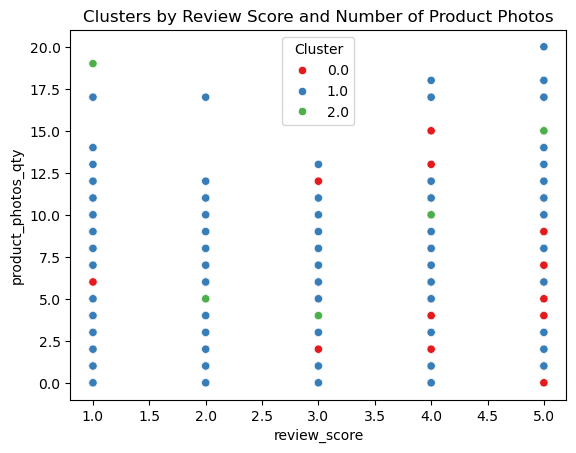

In [35]:
# Example 5: review_score vs number of photos
sns.scatterplot(data=df_kmeans, x='review_score', y='product_photos_qty', hue='Cluster', palette='Set1')
plt.title('Clusters by Review Score and Number of Product Photos')
plt.show()

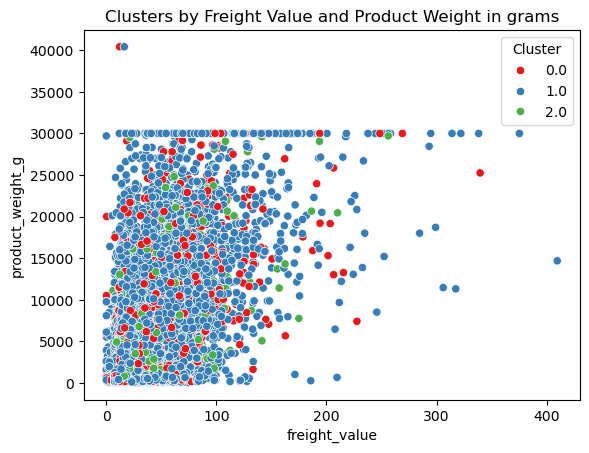

In [36]:
# Example 6: freight_value vs product weight
sns.scatterplot(data=df_kmeans, x='freight_value', y='product_weight_g', hue='Cluster', palette='Set1')
plt.title('Clusters by Freight Value and Product Weight in grams')
plt.show()

In [37]:
df_kmeans.groupby('Cluster').mean(numeric_only=True)


payment_installments  payment_value       price  freight_value  \
Cluster                                                                   
0.0                  2.872856     155.006376  127.065967      20.105840   
1.0                  2.844167     152.738366  124.962553      20.247052   
2.0                  2.875611     150.292792  123.697664      20.187712   

         product_photos_qty  product_weight_g  review_score  \
Cluster                                                       
0.0                2.219521       2117.135189      4.160265   
1.0                2.211155       2115.808052      4.152493   
2.0                2.275895       2082.342898      4.163960   

         delivery_time_days  
Cluster                      
0.0               12.048508  
1.0               12.074214  
2.0               11.961532

In [41]:
pd.set_option('display.max_columns', None)  # Setting to show all columns on next step

In [40]:
df_kmeans.groupby('Cluster').describe()

payment_installments                                                \
                       count      mean       std  min  25%  50%  75%   max   
Cluster                                                                      
0.0                  17028.0  2.872856  2.689112  0.0  1.0  1.0  4.0  24.0   
1.0                  73046.0  2.844167  2.677554  0.0  1.0  1.0  4.0  24.0   
2.0                   6343.0  2.875611  2.720296  1.0  1.0  1.0  4.0  24.0   

        payment_value                                                         \
                count        mean         std   min     25%     50%      75%   
Cluster                                                                        
0.0           17028.0  155.006376  214.332234  0.01  57.510  100.33  173.880   
1.0           73046.0  152.738366  213.741453  0.00  56.780  100.00  171.080   
2.0            6343.0  150.292792  207.821722  0.05  55.595   97.65  167.095   

                     price                                             \
              max    count        mean         std   min    25%   50%   
Cluster                                                                 
0.0       7274.88  17028.0  127.065967  189.846922  3.90  42.99  79.0   
1.0      13664.08  73046.0  124.962553  189.136102  0.85  41.00  79.0   
2.0       4681.78   6343.0  123.697664  189.196056  3.00  40.00  77.9   

                          freight_value                                    \
              75%     max         count       mean        std  min    25%   
Cluster                                                                     
0.0      139.9900  6499.0       17028.0  20.105840  15.482335  0.0  13.37   
1.0      139.6275  6735.0       73046.0  20.247052  15.945849  0.0  13.34   
2.0      135.9000  4590.0        6343.0  20.187712  15.934663  0.0  13.08   

                                 product_photos_qty                           \
            50%      75%     max              count      mean       std  min   
Cluster                                                                        
0.0      16.350  21.2225  375.28            17028.0  2.219521  1.754897  0.0   
1.0      16.405  21.2500  409.68            73046.0  2.211155  1.747882  0.0   
2.0      16.270  21.4250  256.13             6343.0  2.275895  1.803811  0.0   

                             product_weight_g                                 \
         25%  50%  75%   max            count         mean          std  min   
Cluster                                                                        
0.0      1.0  1.0  3.0  17.0          17028.0  2117.135189  3761.715992  0.0   
1.0      1.0  1.0  3.0  20.0          73046.0  2115.808052  3794.917510  0.0   
2.0      1.0  2.0  3.0  19.0           6343.0  2082.342898  3730.258102  0.0   

                                       review_score                           \
           25%    50%     75%      max        count      mean       std  min   
Cluster                                                                        
0.0      300.0  700.0  1825.0  40425.0      17028.0  4.160265  1.282947  1.0   
1.0      300.0  700.0  1800.0  40425.0      73046.0  4.152493  1.286154  1.0   
2.0      300.0  700.0  1825.0  30000.0       6343.0  4.163960  1.286803  1.0   

                            delivery_time_days                                 \
         25%  50%  75%  max              count       mean       std  min  25%   
Cluster                                                                         
0.0      4.0  5.0  5.0  5.0            17028.0  12.048508  9.405154  0.0  6.0   
1.0      4.0  5.0  5.0  5.0            73046.0  12.074214  9.463940  0.0  6.0   
2.0      4.0  5.0  5.0  5.0             6343.0  11.961532  9.563334  0.0  6.0   

                            
          50%   75%    max  
Cluster                     
0.0      10.0  15.0  187.0  
1.0      10.0  15.0  208.0  
2.0      10.0  15.0  194.0

# Results

## Reviewing the statistics on the 3 clusters:
    1) Clusters are very similar to each other in their means. However, cluster 1 includes 73% of the total data - 73,046 rows.
    2) Payment_installments: One single payment dominates but the max goes out to 24 in all clusters. 
    3) Price is evently divided among all 3 clusters.
    4) Delivery time is consistenlty ~12 days, but outliers exist in all clusters, 187-208 days.
    5) Review scores are mostly 5's accross all clusters. 
    6) Photo qty and Product weight don't show differences either. 
## The model did not strongly seggregate the variables and thus other methods will need to be applied. 
 

### Initially I wanted to investigate delivery days.  This excercise did let me know that the average is 12 days and that there are outliers.  They did not, however, have any correlation with the review_score; from previous lesson.  I intended to map them but it may not be needed. 
### It does answer that freight costs do not impact the customer satisfaction. 